In [205]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Loading data as a dataframe.

In [206]:
san_francisco = pd.read_csv("./datasets/Flood_Health_Decintile_Sort.csv")
san_francisco.head()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Decintiles,FloodHealthIndex_Quintiles
0,60759809001,0.072957,8.037850e-10,0.599175,0.356678,0.996080,0.150559,-6.00000,0.182261,0.035771,22.0584,36.5200,15.1339,0.133608,14.10930,17.5025,0.480591,84.8190,10,5
1,60750201001,0.079893,1.240000e-01,0.651000,0.509706,0.724000,0.232000,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238000,10.24060,15.8921,0.522000,83.4860,10,5
2,60750117001,0.027149,1.030000e-01,0.697000,0.378595,0.862000,0.171000,-1.99906,0.106609,0.005321,1.4068,98.5924,0.8008,0.187000,39.56220,4.9374,0.635000,83.4791,10,5
3,60750178021,0.084215,8.800000e-02,0.584000,0.327362,0.843000,0.119000,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229000,7.04366,19.2683,0.427000,82.4925,10,5
4,60750125012,0.095332,2.219991e-01,0.726001,0.794750,0.694997,0.202999,7.13278,0.000000,0.004105,15.5000,63.7499,12.9672,0.424998,13.72550,14.6184,0.731997,81.8061,10,5


Basic Statistics

In [207]:
san_francisco.describe().drop("count", axis=0)

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Decintiles,FloodHealthIndex_Quintiles
mean,6.075033e+10,0.131671,1.430411e-01,0.567669,0.271585,0.869517,0.124782,124.147322,0.010224,0.007366,8.317175,19.953382,4.748124,1.034424e-01,6.021817,4.713140,0.347597,49.569516,5.768166,3.000000
std,8.011773e+05,0.057074,6.102362e-02,0.213813,0.154539,0.108676,0.108760,104.939767,0.050148,0.014039,6.101610,15.429652,3.384794,5.513568e-02,8.160820,5.726493,0.148501,13.343632,2.724475,1.416662
min,6.075010e+10,0.007243,8.037850e-10,0.128998,0.057373,0.363000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.051100,0.000000,1.050660e-09,0.000000,0.260200,0.062731,19.293200,1.000000,1.000000
25%,6.075017e+10,0.089490,1.020000e-01,0.403000,0.165123,0.814500,0.046000,35.303625,0.000000,0.000816,4.300800,9.040000,2.710900,7.424997e-02,2.830483,0.520700,0.227000,39.561450,3.000000,2.000000
50%,6.075025e+10,0.133925,1.390000e-01,0.565000,0.234190,0.899000,0.104500,111.691500,0.000000,0.002560,6.428200,14.280000,3.823850,9.378748e-02,4.763075,3.131250,0.325000,47.929400,6.000000,3.000000
75%,6.075033e+10,0.170120,1.730000e-01,0.721750,0.331840,0.954001,0.180500,183.484250,0.000000,0.007140,11.200000,26.817075,5.460375,1.150000e-01,7.256355,4.615400,0.458551,58.226175,8.000000,4.000000
max,6.075981e+10,0.452256,5.540000e-01,0.981456,0.840098,1.000999,0.715007,558.279000,0.503456,0.155139,97.368700,98.592400,16.115600,4.520000e-01,170.940000,19.268300,0.732000,84.819000,10.000000,5.000000


Exploration with Flood Index Quintiles as a category

In [208]:
san_francisco.groupby("FloodHealthIndex_Quintiles").min()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Decintiles
FloodHealthIndex_Quintiles,,,,,,,,,,,,,,,,,,,
1,60750128002,0.044489,2.977580e-02,0.186000,0.057373,0.775194,0.000000,-6.75712,0.0,0.0,0.0,0.0511,0.0,2.400003e-02,0.193517,0.2606,0.139000,19.2932,1
2,60750126022,0.044489,4.999985e-02,0.128998,0.057373,0.705228,0.000000,-7.20480,0.0,0.0,0.0,5.1498,0.0,2.400000e-02,0.000000,0.2606,0.064521,37.8997,3
3,60750102002,0.028313,5.000000e-02,0.155000,0.071228,0.686715,0.006000,-1.31835,0.0,0.0,0.0,5.1600,0.0,3.700004e-02,0.340483,0.2606,0.065000,44.2862,5
4,60750102001,0.007243,2.330006e-02,0.155000,0.069069,0.496997,0.009882,-16.99000,0.0,0.0,0.0,0.9466,0.0,1.050660e-09,0.000000,0.2606,0.062731,51.2730,7
5,60750101001,0.009804,8.037850e-10,0.408160,0.129087,0.363000,0.034926,-42.00000,0.0,0.0,0.0,4.0262,0.0,4.685419e-02,0.237586,0.2602,0.087000,61.2794,9


Scatterplots of Demographic Factors against Flood Health Index

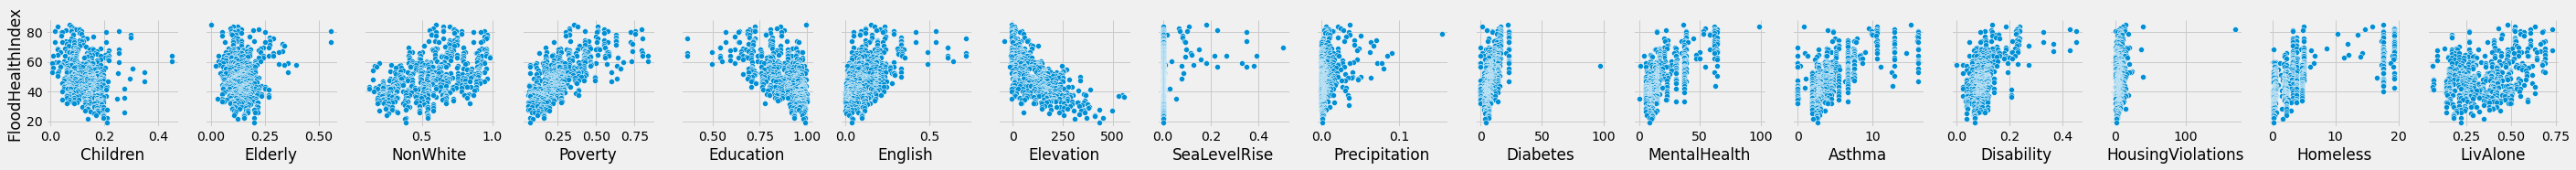

In [209]:
import seaborn as sns
pp = sns.PairGrid(data=san_francisco,
                  y_vars=['FloodHealthIndex'],
                  x_vars=list(san_francisco.columns)[1:-3])
pp.map(sns.scatterplot)

Correlating Variables to FHI

In [210]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
columns = list(san_francisco.columns)[1:-3]
fhi = san_francisco[['FloodHealthIndex']]

correlationType  = dict()
significant_metrics = {}
for column in columns:
    non_linear_corr, p1 = spearmanr(fhi, san_francisco[column])
    linear_corr, p2 = pearsonr(san_francisco[column], fhi)
    if abs(non_linear_corr) > abs(linear_corr[0]):
        larger_corr = non_linear_corr
        correlationType.update({column: "nonlinear"})
    else:
        larger_corr = linear_corr[0]
        correlationType.update({column: "linear"})
    
    if abs(larger_corr) >= .3:
        significant_metrics[column] = larger_corr

    
    print(f"{column}: {larger_corr} ({correlationType[column]})")
print(significant_metrics)




Children: -0.26308733248861554 (nonlinear)
Elderly: 0.07791234487601838 (linear)
NonWhite: 0.47987912437901153 (nonlinear)
Poverty: 0.693046296055 (nonlinear)
Education: -0.5637919102587562 (linear)
English: 0.5150096592691067 (nonlinear)
Elevation: -0.6729305040032092 (nonlinear)
SeaLevelRise: 0.2892299805806113 (nonlinear)
Precipitation: 0.30912072247333705 (linear)
Diabetes: 0.5802448846886352 (nonlinear)
MentalHealth: 0.6621334818266624 (nonlinear)
Asthma: 0.6263732563188594 (nonlinear)
Disability: 0.5605332023005422 (linear)
HousingViolations: 0.20879543570571726 (linear)
Homeless: 0.614698873917741 (nonlinear)
LivAlone: 0.3023663102717023 (linear)
{'NonWhite': 0.47987912437901153, 'Poverty': 0.693046296055, 'Education': -0.5637919102587562, 'English': 0.5150096592691067, 'Elevation': -0.6729305040032092, 'Precipitation': 0.30912072247333705, 'Diabetes': 0.5802448846886352, 'MentalHealth': 0.6621334818266624, 'Asthma': 0.6263732563188594, 'Disability': 0.5605332023005422, 'Homeles

## Machine Learning Models

In [211]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Permutation Importance Function

In [212]:
def model_permutation_importance(clf, X_test, y_test, significant_metrics):
    perm_importance = permutation_importance(clf, X_test, y_test)

    feature_names = list(significant_metrics.keys())
    features = np.array(feature_names)

    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")

### kNN Model

Best K: 1
Accuracy for Best K: 0.8109195402298851


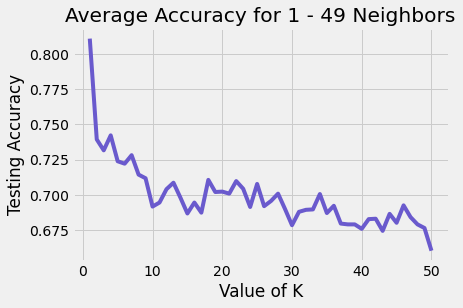

In [213]:
from sklearn.neighbors import KNeighborsClassifier

X = san_francisco[list(significant_metrics.keys())] 
y = san_francisco[['Decintiles']] 
accuracy = []

for i in range(1, 51):
    height_accuracy = []
    for j in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf = KNeighborsClassifier(n_neighbors = i) 
        scaler = StandardScaler() 
        scaler.fit(X_train)
        X_train = scaler.transform(X_train) 
        X_test = scaler.transform(X_test) 
        clf.fit(X_train, np.ravel(y_train,order='C')) 
        y_pred = clf.predict(X_test)
        height_accuracy.append(metrics.accuracy_score(y_test, y_pred) + metrics.accuracy_score(y_test, [x+1 for x in y_pred]) + metrics.accuracy_score(y_test, [x-1 for x in y_pred]))
    accuracy.append(sum(height_accuracy)/len(height_accuracy))
print(f"Best K: {accuracy.index(max(accuracy)) + 1}")
print(f"Accuracy for Best K: {max(accuracy)}")

plt.plot(range(1,51), accuracy, color = 'slateblue')
plt.xlabel('Value of K') 
plt.ylabel('Testing Accuracy') 
plt.title('Average Accuracy for 1 - 49 Neighbors') 
plt.show()

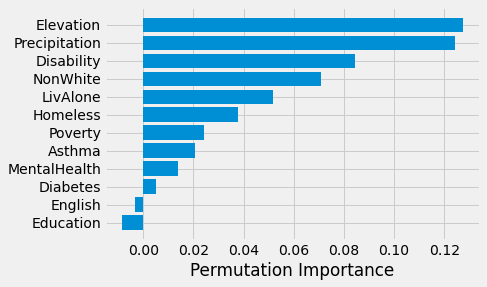

In [214]:
clf = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy)) + 1) 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 
clf.fit(X_train, np.ravel(y_train,order='C'))
model_permutation_importance(clf, X_test, y_test, significant_metrics)

### Decision Tree Model

In [215]:
from sklearn.tree import DecisionTreeClassifier


X = san_francisco[list(significant_metrics.keys())] #
y = san_francisco[['Decintiles']] #
accuracy = []

for i in range(1, 50):
    height_accuracy = []
    for j in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf = DecisionTreeClassifier(max_depth=i) 
        scaler = StandardScaler() 
        scaler.fit(X_train)
        X_train = scaler.transform(X_train) 
        X_test = scaler.transform(X_test) 
        clf.fit(X_train, np.ravel(y_train,order='C')) 
        y_pred = clf.predict(X_test)
        height_accuracy.append(metrics.accuracy_score(y_test, y_pred) + metrics.accuracy_score(y_test, [x+1 for x in y_pred]) + metrics.accuracy_score(y_test, [x-1 for x in y_pred]))

    accuracy.append(sum(height_accuracy)/len(height_accuracy))

print(f"Best Height: {accuracy.index(max(accuracy)) + 1}")
print(f"Accuracy for Best Height: {max(accuracy)}")

Best Height: 48
Accuracy for Best Height: 0.8100574712643678


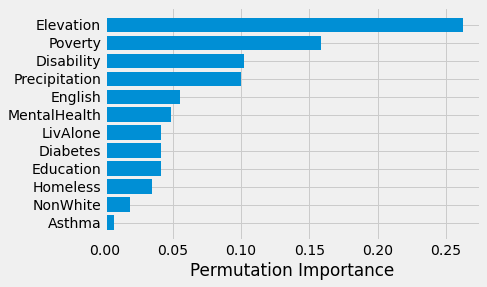

In [216]:
clf = DecisionTreeClassifier(max_depth = accuracy.index(max(accuracy)) + 1) 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 
clf.fit(X_train, np.ravel(y_train,order='C'))
model_permutation_importance(clf, X_test, y_test, significant_metrics)

### Support Vector Machine Model

In [217]:
### Support Vector Machine Model
from sklearn.svm import SVC

# Splitting into Training and Testin Sets
X = san_francisco[list(significant_metrics.keys())] #
y = san_francisco[['Decintiles']] #
accuracy = []
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC(kernel='linear', C = 1) 
    scaler = StandardScaler() 
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test) 
    clf.fit(X_train, np.ravel(y_train,order='C')) 
    y_pred = clf.predict(X_test)
    from sklearn import metrics
    accuracy.append(metrics.accuracy_score(y_test, y_pred) + metrics.accuracy_score(y_test, [x+1 for x in y_pred]) + metrics.accuracy_score(y_test, [x-1 for x in y_pred]))

print("Accuracy:",sum(accuracy)/len(accuracy))

Accuracy: 0.8426293103448281


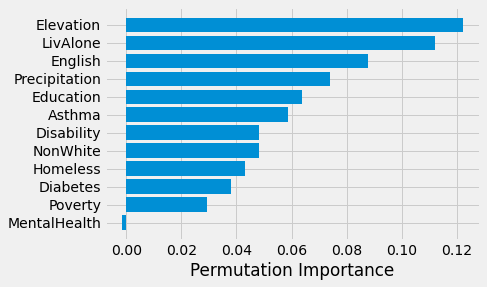

In [218]:
clf = SVC(kernel = 'linear', C = 1) 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 
clf.fit(X_train, np.ravel(y_train,order='C'))
model_permutation_importance(clf, X_test, y_test, significant_metrics)